In [1]:
%matplotlib inline
import pandas as pd
from ipywidgets import widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
import sklearn.metrics as metrics
import pydotplus 
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
import pydotplus 
from sklearn import preprocessing
pd.options.mode.chained_assignment = None
from sklearn.svm import SVC

In [2]:
normalized_data = pd.read_csv('data/Normalized_active.csv')

In [3]:
normalized_data.shape

(16117, 67)

In [8]:
normalized_data.columns.values

array(['gender_F', 'gender_M', 'CollegeProspects_Frequency',
       'MessagesReceived', 'MessagesReceived_Frequency', 'MessagesSent',
       'MessagesSent_Frequency', 'monthly_price', 'Hit_Frequency_Pandas',
       'Hprofileview_Freq', 'Hcoachimport_Freq', 'Hmessage_Freq',
       'Hsearchhit_Freq', 'Hcoacheval_Freq', 'Hemailopen_Freq',
       'Ecoach_list_known_updated_Freq', 'ECoachEmailOpen_Freq',
       'ECoachEval_Freq', 'ECoachSearchHit_Freq', 'ECoachVisit_Freq',
       'Ecolleges_going_to_the_event_Freq', 'EEmailsDigest_Freq',
       'Epost_event_email_Freq'], dtype=object)

In [5]:
Y = normalized_data['CaptainU_CHURN']

In [7]:
normalized_data.drop(['CaptainU_CHURN','Unnamed: 0', 'NumYear', 'NumMonth', 'index_col',
    'Duration', 'EventsAttended',
       'EventsAttended_Frequency', 'Hits', 'Hits_Frequency',
       'Hprofileview', 'Hcoachimport', 'Hmessage', 'Hsearchhit',
       'Hcoacheval', 'Hvideoview', 'Hemailopen', 'Emails',
       'Emails_Frequency', 'EAthlete newsletter', 'Eathlete_new',
       'Eathlete_new_info_request', 'ECCNote', 'ECCNote_camp',
       'Ecoach_list_known_updated', 'ECoachEmailOpen', 'ECoachEval',
       'ECoachImport', 'ECoachSearchHit', 'ECoachVideoViewHit',
       'ECoachVisit', 'Ecolleges_going_to_the_event',
       'Efailed_subscription', 'EEmailsDigest', 'Eparent_new',
       'Eparent_welcome', 'Epost_event_email', 'Esms_update',
       'CollegeProspects','Efailed_subscription_Freq','ECoachImport_Freq','Eathlete_new_info_request_Freq'
                      ,'ECCNote_Freq','Esms_update_Freq'],axis = 1, inplace = True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, Y, test_size=0.20, random_state=0)


In [27]:
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))

8061
4832


In [28]:
print(len(y_test[y_test==0]))
print(len(y_test[y_test==1]))

2013
1211


In [10]:
import math
import numpy as np
import pandas as pd
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score, cross_val_predict, StratifiedKFold 
from sklearn import preprocessing, metrics, svm, ensemble
from sklearn.metrics import accuracy_score, classification_report

/Users/jamesmwakichako/Documents/Kaggle/kaggle_py/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jamesmwakichako/Documents/Kaggle/kaggle_py/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [11]:
# 10 fold stratified cross validation
kf = StratifiedKFold(y_train, n_folds=10, random_state=None, shuffle=True)

# Define the parameter grid to use for tuning the Support Vector Machine
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# Pick the goal you're optimizing for e.g. precision if you prefer fewer false-positives
# recall if you prefer fewer false-negatives. For demonstration purposes let's pick several
# Note that the final model selection will be based on the last item in the list
scoringmethods = ['f1','accuracy','precision', 'recall','roc_auc']

In [12]:
# Logistic regression with 10 fold stratified cross-validation using model specific cross-validation in scikit-learn
lgclf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))),penalty='l2',scoring='roc_auc',cv=kf)
lgclf.fit(X_train, y_train)
y_pred = lgclf.predict(X_test)

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")
print(classification_report(y_test, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test, y_pred))

Classification report:
             precision    recall  f1-score   support

          0       0.82      0.86      0.84      2013
          1       0.75      0.68      0.71      1211

avg / total       0.79      0.79      0.79      3224

Accuracy: 0.793
Aucroc: 0.770


Confusion matrix, without normalization
[[1733  280]
 [ 388  823]]
Normalized confusion matrix
[[ 0.86  0.14]
 [ 0.32  0.68]]


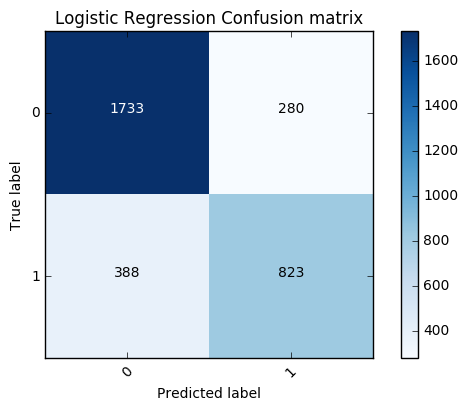

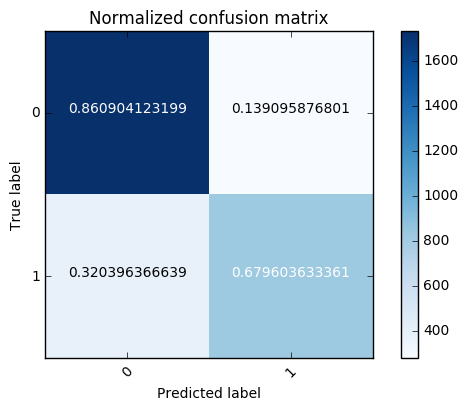

In [13]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic Regression Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [14]:
# Logistic regression with 10 fold stratified cross-validation using model specific cross-validation in scikit-learn
lgclf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))),penalty='l2',scoring='roc_auc',cv=kf,
                            class_weight='balanced')
lgclf.fit(X_train, y_train)
y_pred = lgclf.predict(X_test)

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")
print(classification_report(y_test, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test, y_pred))

Classification report:
             precision    recall  f1-score   support

          0       0.87      0.73      0.80      2013
          1       0.65      0.82      0.73      1211

avg / total       0.79      0.77      0.77      3224

Accuracy: 0.766
Aucroc: 0.777


Confusion matrix, without normalization
[[1471  542]
 [ 213  998]]
Normalized confusion matrix
[[ 0.73  0.27]
 [ 0.18  0.82]]


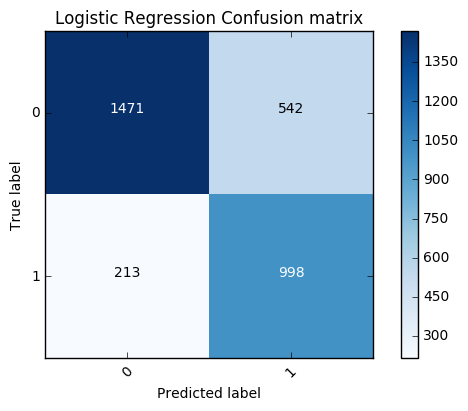

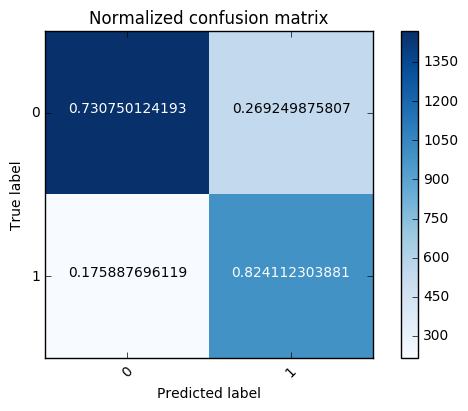

In [15]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic Regression Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [16]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print("Best model:")

print (CV_rfc.best_estimator_)

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")    
y_pred = CV_rfc.predict(X_test)
print(classification_report(y_test, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test, y_pred))

Best model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)
Classification report:
             precision    recall  f1-score   support

          0       0.84      0.88      0.86      2013
          1       0.79      0.72      0.75      1211

avg / total       0.82      0.82      0.82      3224

Accuracy: 0.822
Aucroc: 0.801


Confusion matrix, without normalization
[[1781  232]
 [ 343  868]]
Normalized confusion matrix
[[ 0.88  0.12]
 [ 0.28  0.72]]


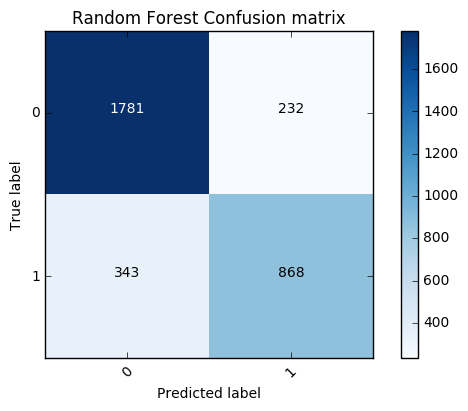

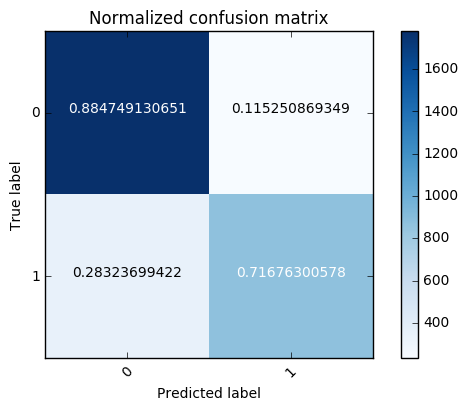

In [17]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Random Forest Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [18]:
# Define the parameter grid to use for tuning the Gradient Boosting Classifier
gridparams = dict(learning_rate=[0.01, 0.1],loss=['deviance','exponential'])

# Parameters we're not tuning for this classifier
params = {'n_estimators': 1500, 'max_depth': 4}

# Setup for grid search with cross-validation for Gradient Boosting Classifier
# n_jobs=-1 for parallel execution using all available cores
gbclf = GridSearchCV(ensemble.GradientBoostingClassifier(**params), gridparams, cv=kf, scoring='roc_auc',n_jobs=-1)
gbclf.fit(X_train, y_train)

# Show the definition of the best model
print("Best model:")
print(gbclf.best_estimator_)
print("")

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")    
y_pred = gbclf.predict(X_test)
print(classification_report(y_test, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test, y_pred))

Best model:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

Classification report:
             precision    recall  f1-score   support

          0       0.85      0.87      0.86      2013
          1       0.77      0.75      0.76      1211

avg / total       0.82      0.82      0.82      3224

Accuracy: 0.823
Aucroc: 0.809


Confusion matrix, without normalization
[[1742  271]
 [ 299  912]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.25  0.75]]


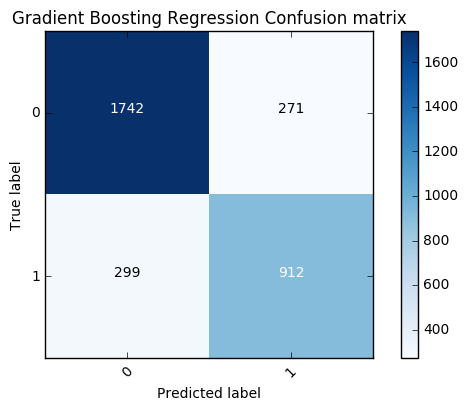

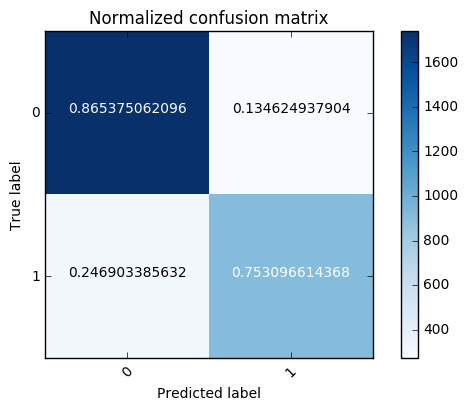

In [19]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Gradient Boosting Regression Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [22]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train)


# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")    
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test, y_pred))

Classification report:
             precision    recall  f1-score   support

          0       0.82      0.87      0.84      2013
          1       0.75      0.67      0.71      1211

avg / total       0.79      0.79      0.79      3224

Accuracy: 0.794
Aucroc: 0.770


Confusion matrix, without normalization
[[1743  270]
 [ 395  816]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.33  0.67]]


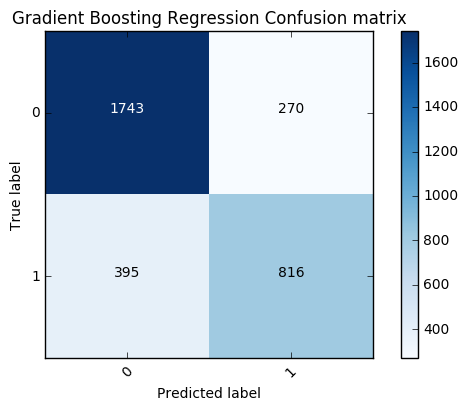

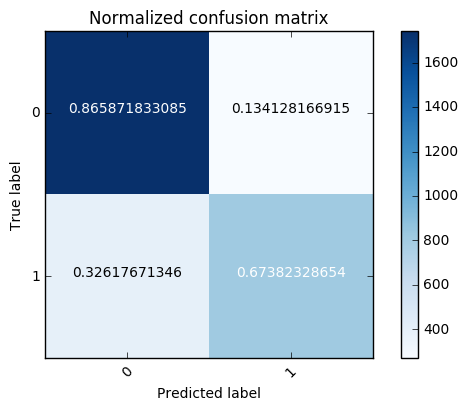

In [23]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Gradient Boosting Regression Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

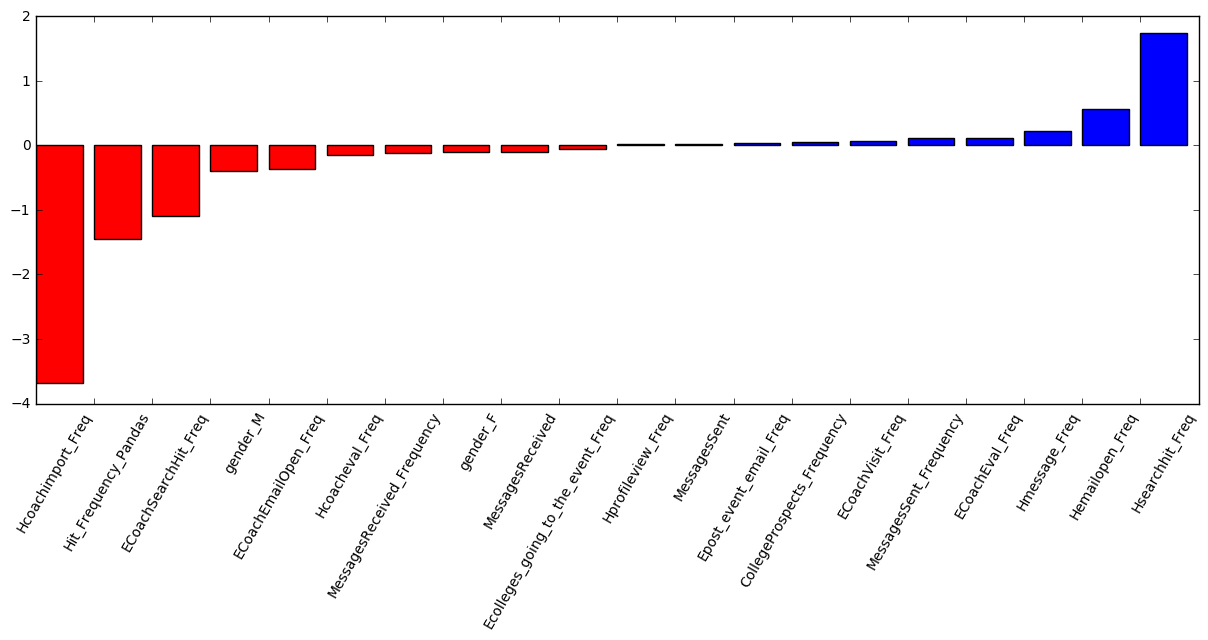

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=10):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()
#cv = CountVectorizer()
#cv.fit(data)
#print len(cv.vocabulary_)
#print cv.get_feature_names()
#X_train = cv.transform(data)

svm = LinearSVC()
svm.fit(X_train, y_train)
plot_coefficients(svm, X_train.columns.values)